# Installs / Imports

In [ ]:
# install conda (this restarts the colab kernel -- wait until restart before running subsequent blocks)

!pip install condacolab
import condacolab
condacolab.install_miniconda()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:39
🔁 Restarting kernel...


In [ ]:
!pip install rasterio # pip install necessary to avoid error in this package
!pip install wget
!pip install geopandas


/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 12.2 MB 34.7 MB/s 
     |████████████████████████████████| 16.9 MB 35.4 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 2.3 MB 39.5 MB/s 
     |████████████████████████████████| 7.8 MB 52.3 MB/s 
     |████████████████████████████████| 499 kB 55.4 MB/s 
    

In [ ]:
import rasterio
import rasterio.features
import rasterio.warp
import rasterio.plot
import rasterio.rio 
import rasterio.windows
import wget
import zipfile
import os
import warnings
import fiona

import numpy as np
import pandas as pd
import geopandas as gpd

from google.colab import drive
from matplotlib import pyplot as plt
from shapely.geometry import Polygon, Point
plt.rcParams['figure.dpi'] = 200

# Data downloading

In [ ]:
# download storm surge data

!wget https://www.nhc.noaa.gov/gis/hazardmaps/PR_SLOSH_MOM_Inundation.zip

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-01-26 13:47:54--  https://www.nhc.noaa.gov/gis/hazardmaps/PR_SLOSH_MOM_Inundation.zip
Resolving www.nhc.noaa.gov (www.nhc.noaa.gov)... 18.160.46.71, 18.160.46.57, 18.160.46.106, ...
Connecting to www.nhc.noaa.gov (www.nhc.noaa.gov)|18.160.46.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7271715 (6.9M) [application/zip]
Saving to: ‘PR_SLOSH_MOM_Inundation.zip’

PR_SLOSH_MOM_Inunda 100%[===================>]   6.93M  30.1MB/s    in 0.2s    

2023-01-26 13:47:54 (30.1 MB/s) - ‘PR_SLOSH_MOM_Inundation.zip’ saved [7271715/7271715]



In [ ]:
# unzip data

!unzip PR_SLOSH_MOM_Inundation.zip

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Archive:  PR_SLOSH_MOM_Inundation.zip
  inflating: PR_SLOSH_MOM_Inundation_11_2018/PR_Category1_MOM_Inundation_HighTide.tfw  
  inflating: PR_SLOSH_MOM_Inundation_11_2018/PR_Category1_MOM_Inundation_HighTide.tif  
  inflating: PR_SLOSH_MOM_Inundation_11_2018/PR_Category1_MOM_Inundation_HighTide.tif.aux.xml  
  inflating: PR_SLOSH_MOM_Inundation_11_2018/PR_Category1_MOM_Inundation_HighTide.tif.ovr  
  inflating: PR_SLOSH_MOM_Inundation_11_2018/PR_Category1_MOM_Inundation_HighTide.tif.vat.dbf  
  inflating: PR_SLOSH_MOM_Inundation_11_2018/PR_Category1_MOM_Inundation_HighTide.tif.xml  
  inflating: PR_SLOSH_MOM_Inundation_11_2018/PR_Category2_MOM_Inundation_HighTide.tfw  
  inflating: PR_SLOSH_MOM_Inundation_11_2018/PR_Category2_MOM_Inundation_HighTide.tif  
  inflating: PR_SLOSH_MOM_Inundation_11_2018/PR_Category2_MOM_Inundation_HighTide.tif.aux.xml  
  inflating: PR_SLOSH_MOM_Inundation_11_

# Data visualization

In [ ]:
image = rasterio.open("/content/PR_SLOSH_MOM_Inundation_11_2018/PR_Category5_MOM_Inundation_HighTide.tif") # note, there is also cat 1 through 5 available

In [ ]:
display(image.meta) # metadata of the tif -- maybe useful

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 31329,
 'height': 10580,
 'count': 1,
 'crs': CRS.from_epsg(4269),
 'transform': Affine(8.983152799999983e-05, 0.0, -67.32562373311394,
        0.0, -8.983152799999988e-05, 18.57019789422725)}

CRS.from_epsg(4269)

In [ ]:
!rio info /content/PR_SLOSH_MOM_Inundation_11_2018/PR_Category5_MOM_Inundation_HighTide.tif --verbose # more image metadata, including latlon, min, max, mean

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
{"blockxsize": 128, "blockysize": 128, "bounds": [-67.32562373311394, 17.61978032798725, -64.51129179240195, 18.57019789422725], "checksum": [31638], "colorinterp": ["gray"], "compress": "lzw", "count": 1, "crs": "EPSG:4269", "descriptions": [null], "driver": "GTiff", "dtype": "uint8", "height": 10580, "indexes": [1], "interleave": "band", "lnglat": [-65.91845776275795, 18.09498911110725], "mask_flags": [["nodata"]], "nodata": 255.0, "res": [8.983152799999983e-05, 8.983152799999988e-05], "shape": [10580, 31329], "stats": [{"max": 16.0, "mean": 5.1224524101518, "min": 1.0, "std": 2.8283671568545}], "tiled": true, "transform": [8.983152799999983e-05, 0.0, -67.32562373311394, 0.0, -8.983152799999988e-05, 18.57019789422725, 0.0, 0.0, 1.0], "units": [null], "width": 31329}


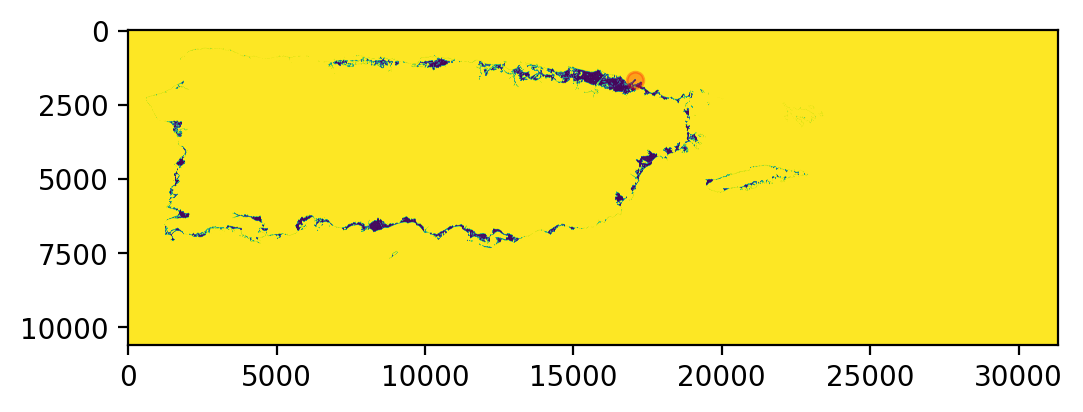

In [ ]:
plt.imshow(image.read(1)) # read the first band of the tif (there's only one band) and plot it. note that image.read(1) is a numpy array
plt.scatter(17084, 1652, c = "red", alpha = 0.3) # focus on this distinctive area to ensure supplying latlon gets the correct pixel value (the numbers 17074 and 1692 are calculated later)
plt.show() # note that the x axis is increasing (0 to 30,000), while the y axis is decreasing (10,000 to 0) -- be careful with xlim and ylim to avoid rotating the image

# Get EF value from a given lat / long

In [ ]:
rasterio.crs.epsg_treats_as_latlong(image.crs) # since this is true, can directly supply latlon coordinates into the images transform function to turn them into rows/columns

True

In [ ]:
lat, lon = 18.421771, -65.790870   # this is a recognisable point on the coast of Puerto Rico, latlon taken from google maps

# the following function takes either floats or lists of floats (or numpy arrays) containing latlon coords, and outputs the rows/columns where those latlon values occur
rows, cols = rasterio.transform.rowcol(image.transform, lon, lat) # note that lat and lon have swapped: I don't know why, but it was way off unswapped
display(rows, cols)

1652

17084

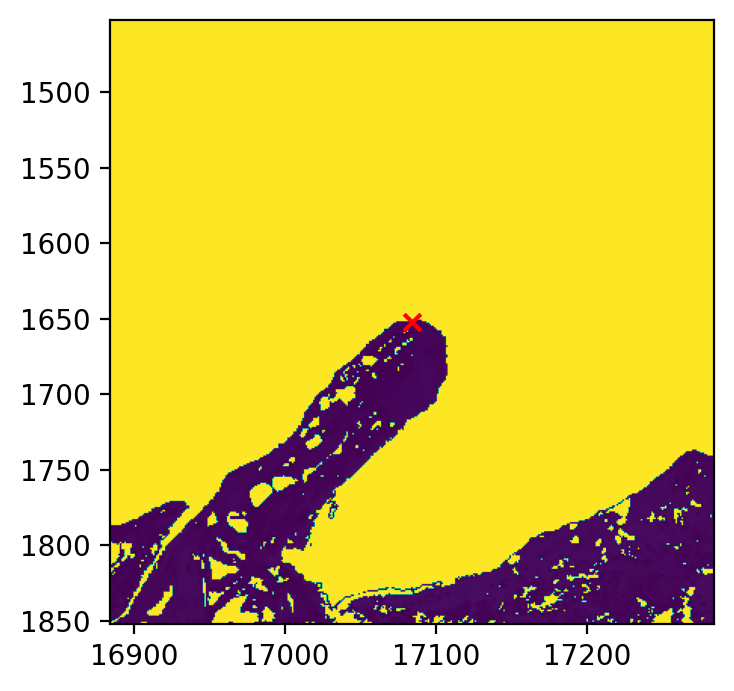

In [ ]:
plt.imshow(image.read(1))
plt.xlim(cols-200, cols+200)
plt.ylim(rows+200, rows-200)
plt.scatter(cols, rows, marker = "x", c = "red") # this point was chosen as it is very recognisable
plt.show()

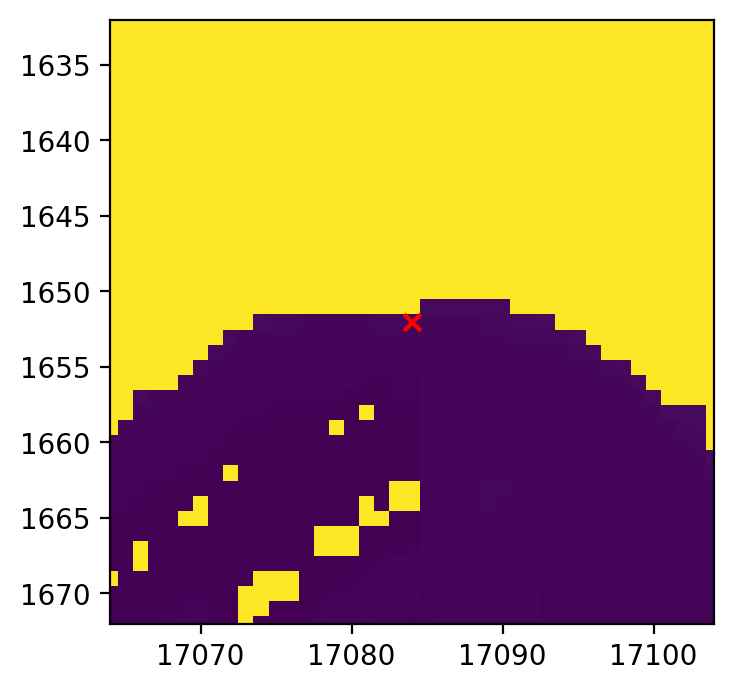

In [ ]:
plt.imshow(image.read(1))
plt.xlim(cols-20, cols+20)
plt.ylim(rows+20, rows-20)
plt.scatter(cols, rows, marker = "x", c = "red") # this point was chosen as it is very recognisable
plt.show()

In [ ]:
display(image.read(1)[rows, cols]) # this is the storm surge value at the red cross, corresponding to 5 - 6ft inundation

6

In [ ]:
display(image.read(1)[rows-2:rows+8, cols-5:cols+5]) # this clearly aligns with the above plot. the pixel value 255 corresponds to no data: this occurs in the ocean or far inland

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   7,   7,   7,   7],
       [  5,   5,   5,   6,   6,   6,   5,   5,   5,   5],
       [  3,   4,   4,   4,   4,   4,   5,   5,   5,   5],
       [  4,   4,   4,   4,   4,   4,   5,   5,   5,   5],
       [  4,   4,   4,   4,   4,   4,   5,   5,   5,   5],
       [  4,   4,   3,   2,   3,   3,   5,   5,   5,   5],
       [  3,   2,   1,   1,   3,   3,   5,   5,   5,   5],
       [  1,   1, 255,   1,   2,   2,   4,   5,   5,   5],
       [255,   1,   1,   1,   1,   1,   4,   5,   5,   5]], dtype=uint8)

# Repeat above but for Southeast US coast

In [ ]:
# download storm surge data

!wget https://www.nhc.noaa.gov/gis/hazardmaps/US_SLOSH_MOM_Inundation_v3.zip

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-01-26 16:34:36--  https://www.nhc.noaa.gov/gis/hazardmaps/US_SLOSH_MOM_Inundation_v3.zip
Resolving www.nhc.noaa.gov (www.nhc.noaa.gov)... 18.65.229.30, 18.65.229.62, 18.65.229.119, ...
Connecting to www.nhc.noaa.gov (www.nhc.noaa.gov)|18.65.229.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1742331314 (1.6G) [application/zip]
Saving to: ‘US_SLOSH_MOM_Inundation_v3.zip’

US_SLOSH_MOM_Inunda 100%[===================>]   1.62G  10.6MB/s    in 2m 38s  

2023-01-26 16:37:14 (10.5 MB/s) - ‘US_SLOSH_MOM_Inundation_v3.zip’ saved [1742331314/1742331314]



In [ ]:
# unzip data

!unzip US_SLOSH_MOM_Inundation_v3.zip

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Archive:  US_SLOSH_MOM_Inundation_v3.zip
  inflating: US_SLOSH_MOM_Inundation_v3/us_Category1_MOM_Inundation_HIGH.tfw  
  inflating: US_SLOSH_MOM_Inundation_v3/us_Category1_MOM_Inundation_HIGH.tif  
  inflating: US_SLOSH_MOM_Inundation_v3/us_Category1_MOM_Inundation_HIGH.tif.aux.xml  
  inflating: US_SLOSH_MOM_Inundation_v3/us_Category1_MOM_Inundation_HIGH.tif.ovr  
 extracting: US_SLOSH_MOM_Inundation_v3/us_Category1_MOM_Inundation_HIGH.tif.vat.cpg  
  inflating: US_SLOSH_MOM_Inundation_v3/us_Category1_MOM_Inundation_HIGH.tif.vat.dbf  
  inflating: US_SLOSH_MOM_Inundation_v3/us_Category1_MOM_Inundation_HIGH.tif.xml  
  inflating: US_SLOSH_MOM_Inundation_v3/us_Category2_MOM_Inundation_HIGH.tfw  
  inflating: US_SLOSH_MOM_Inundation_v3/us_Category2_MOM_Inundation_HIGH.tif  
  inflating: US_SLOSH_MOM_Inundation_v3/us_Category2_MOM_Inundation_HIGH.tif.aux.xml  
  inflating: US_SLOSH_MOM_Inund

In [ ]:
image = rasterio.open("/content/US_SLOSH_MOM_Inundation_v3/us_Category5_MOM_Inundation_HIGH.tif") # note, there is also cat 1 through 5 available

In [ ]:
display(image.meta)
!rio info /content/US_SLOSH_MOM_Inundation_v3/us_Category5_MOM_Inundation_HIGH.tif --verbose # this command is slow (about 5 minutes)

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 252315,
 'height': 136550,
 'count': 1,
 'crs': CRS.from_epsg(4269),
 'transform': Affine(8.983152799999975e-05, 0.0, -98.05986540280205,
        0.0, -8.983152799999972e-05, 36.75816955589585)}

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
{"blockxsize": 128, "blockysize": 128, "bounds": [-98.05986540280205, 24.491674407495886, -75.39402341548211, 36.75816955589585], "checksum": [54670], "colorinterp": ["gray"], "compress": "lzw", "count": 1, "crs": "EPSG:4269", "descriptions": [null], "driver": "GTiff", "dtype": "uint8", "height": 136550, "indexes": [1], "interleave": "band", "lnglat": [-86.72694440914208, 30.624921981695866], "mask_flags": [["nodata"]], "nodata": 255.0, "res": [8.983152799999975e-05, 8.983152799999972e-05], "shape": [136550, 252315], "stats": [{"max": 99.0, "mean": 15.519936494992, "min": 1.0, "std": 12.604720339352}], "tiled": true, "transform": [8.983152799999975e-05, 0.0, -98.05986540280205, 0.0, -8.983152799999972e-05, 36.75816955589585, 0.0, 0.0, 1.0], "units": [null], "width": 252315}


In [ ]:
lat, lon = 29.875385, -85.386684   # this is a recognisable point on the coast of Florida, latlon taken from google maps

# the following function takes either floats or lists of floats (or numpy arrays) containing latlon coords, and outputs the rows/columns where those latlon values occur
rows, cols = rasterio.transform.rowcol(image.transform, lon, lat) # note that lat and lon have swapped: I don't know why, but it was way off unswapped
display(rows, cols)

76618

141077

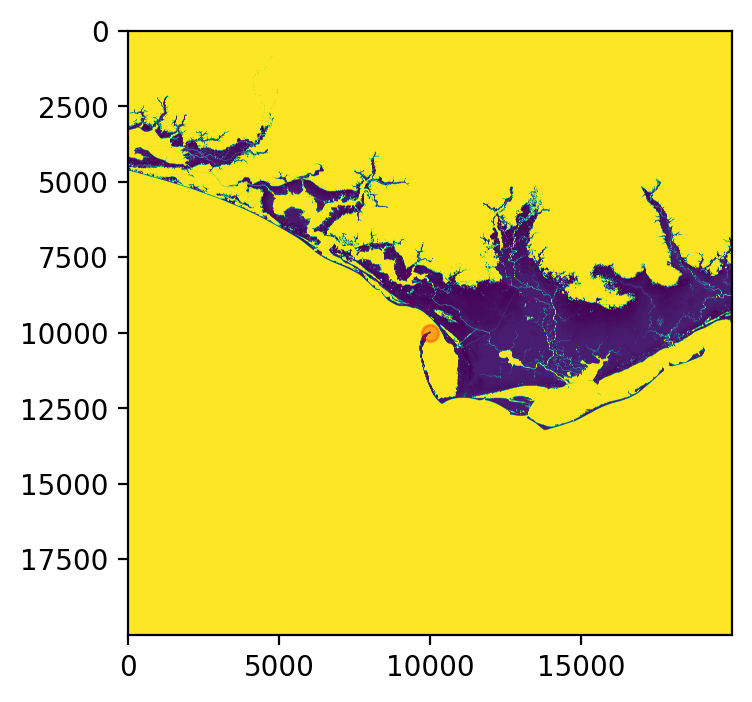

In [ ]:
# image for texas to maine too large to read into RAM fully, so instead an area around the distinctive location is read in
# the window object allows you to selectively read parts of the tif into a numpy array
plt.imshow(image.read(1, window = rasterio.windows.Window(141077-10000, 76618-10000, 20000, 20000))) 
plt.scatter(10000, 10000, c = "red", alpha = 0.3) # focus on this distinctive area to ensure supplying latlon gets the correct pixel value
plt.show() 

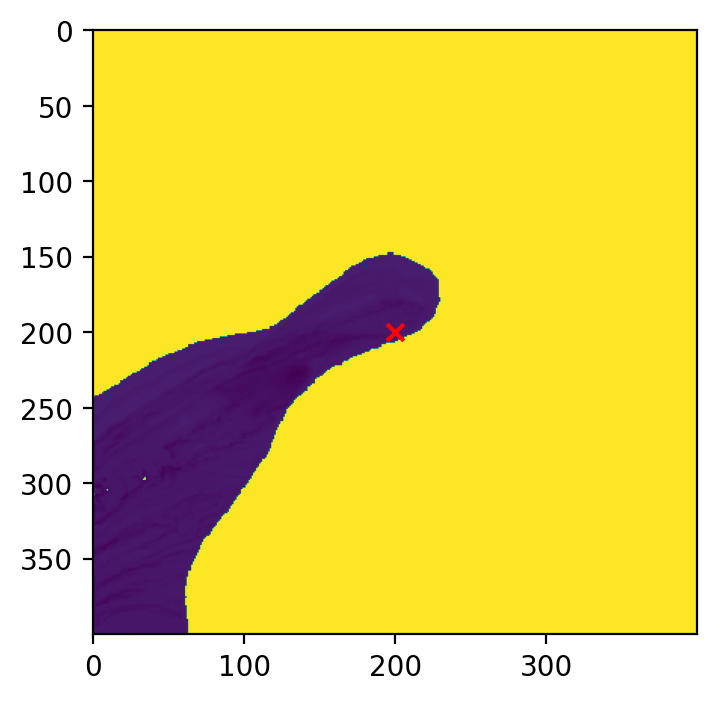

In [ ]:
plt.imshow(image.read(1, window = rasterio.windows.Window(141077-200, 76618-200, 400, 400))) 
plt.scatter(200, 200, marker = "x", c = "red") # this point was chosen as it is very recognisable
plt.show()

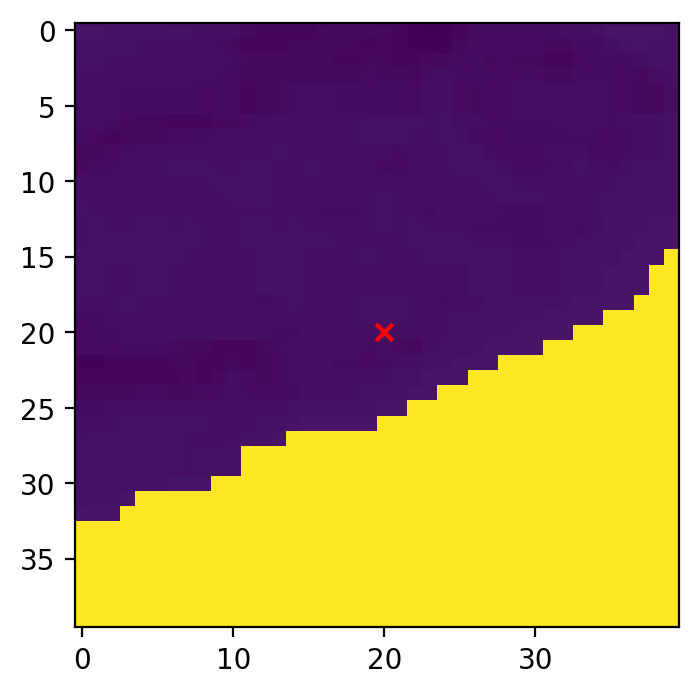

In [ ]:
plt.imshow(image.read(1, window = rasterio.windows.Window(141077-20, 76618-20, 40, 40))) 
plt.scatter(20, 20, marker = "x", c = "red") # this point was chosen as it is very recognisable
plt.show()

In [ ]:
display(image.read(1, window = rasterio.windows.Window(141077-5, 76618-5, 10, 10))) # this clearly aligns with the above plot. the pixel value 255 corresponds to no data: this occurs in the ocean or far inland

array([[ 17,  17,  17,  17,  18,  17,  16,  16,  18,  18],
       [ 17,  17,  17,  17,  17,  17,  17,  16,  17,  16],
       [ 17,  17,  17,  17,  17,  17,  17,  16,  17,  16],
       [ 17,  17,  17,  17,  18,  18,  18,  16,  16,  15],
       [ 16,  17,  17,  17,  18,  18,  18,  16,  17,  17],
       [ 17,  17,  17,  17,  16,  17,  16,  16,  17,  17],
       [ 16,  16,  16,  16,  15,  16,  14,  13,  17,  18],
       [ 17,  17,  15,  15,  14,  15,  16,  17,  18,  19],
       [ 17,  17,  16,  16,  16,  17,  18,  18,  20,  20],
       [ 17,  17,  17,  17,  18,  18,  19,  20,  20, 255]], dtype=uint8)

# Repeat above but for Haiti

In [ ]:
# download storm surge data

!wget https://www.nhc.noaa.gov/gis/hazardmaps/Hispaniola_SLOSH_MOM_Inundation.zip

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-01-26 17:04:33--  https://www.nhc.noaa.gov/gis/hazardmaps/Hispaniola_SLOSH_MOM_Inundation.zip
Resolving www.nhc.noaa.gov (www.nhc.noaa.gov)... 18.65.229.115, 18.65.229.62, 18.65.229.30, ...
Connecting to www.nhc.noaa.gov (www.nhc.noaa.gov)|18.65.229.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28176267 (27M) [application/zip]
Saving to: ‘Hispaniola_SLOSH_MOM_Inundation.zip’

Hispaniola_SLOSH_MO 100%[===================>]  26.87M  7.41MB/s    in 4.5s    

2023-01-26 17:04:38 (5.92 MB/s) - ‘Hispaniola_SLOSH_MOM_Inundation.zip’ saved [28176267/28176267]



In [ ]:
# unzip data

!unzip Hispaniola_SLOSH_MOM_Inundation.zip

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Archive:  Hispaniola_SLOSH_MOM_Inundation.zip
  inflating: Hispaniola_SLOSH_MOM_Inundation_11_2018/Hispaniola_Category0_MOM_Inundation_HighTide.tif  
  inflating: Hispaniola_SLOSH_MOM_Inundation_11_2018/Hispaniola_Category0_MOM_Inundation_HighTide.tif.aux.xml  
  inflating: Hispaniola_SLOSH_MOM_Inundation_11_2018/Hispaniola_Category0_MOM_Inundation_HighTide.tif.ovr  
  inflating: Hispaniola_SLOSH_MOM_Inundation_11_2018/Hispaniola_Category0_MOM_Inundation_HighTide.tif.vat.dbf  
  inflating: Hispaniola_SLOSH_MOM_Inundation_11_2018/Hispaniola_Category0_MOM_Inundation_HighTide.tif.xml  
  inflating: Hispaniola_SLOSH_MOM_Inundation_11_2018/Hispaniola_Category1_MOM_Inundation_HighTide.tfw  
  inflating: Hispaniola_SLOSH_MOM_Inundation_11_2018/Hispaniola_Category1_MOM_Inundation_HighTide.tif  
  inflating: Hispaniola_SLOSH_MOM_Inundation_11_2018/Hispaniola_Category1_MOM_Inundation_HighTide.tif.au

In [ ]:
image = rasterio.open("/content/Hispaniola_SLOSH_MOM_Inundation_11_2018/Hispaniola_Category5_MOM_Inundation_HighTide.tif") # note, there is also cat 1 through 5 available

In [ ]:
display(image.meta)
!rio info /content/Hispaniola_SLOSH_MOM_Inundation_11_2018/Hispaniola_Category5_MOM_Inundation_HighTide.tif --verbose 

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 54977,
 'height': 23415,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0001131144979087051, 0.0, -74.53520783870444,
        0.0, -0.00011311449790870514, 20.130736297658242)}

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
{"blockxsize": 128, "blockysize": 128, "bounds": [-74.53520783870444, 17.48216032912591, -68.31651208717756, 20.130736297658242], "checksum": [64631], "colorinterp": ["gray"], "compress": "lzw", "count": 1, "crs": "EPSG:4326", "descriptions": [null], "driver": "GTiff", "dtype": "uint8", "height": 23415, "indexes": [1], "interleave": "band", "lnglat": [-71.42585996294099, 18.806448313392075], "mask_flags": [["nodata"]], "nodata": 255.0, "res": [0.0001131144979087051, 0.00011311449790870514], "shape": [23415, 54977], "stats": [{"max": 21.0, "mean": 7.343500334291, "min": 1.0, "std": 4.0461669859349}], "tiled": true, "transform": [0.0001131144979087051, 0.0, -74.53520783870444, 0.0, -0.00011311449790870514, 20.130736297658242, 0.0, 0.0, 1.0], "units": [null], "width": 54977}


In [ ]:
lat, lon = 18.544430, -72.387624   # this is a recognisable point in Haiti, latlon taken from google maps

# the following function takes either floats or lists of floats (or numpy arrays) containing latlon coords, and outputs the rows/columns where those latlon values occur
rows, cols = rasterio.transform.rowcol(image.transform, lon, lat) # note that lat and lon have swapped: I don't know why, but it was way off unswapped
display(rows, cols)

14023

18985

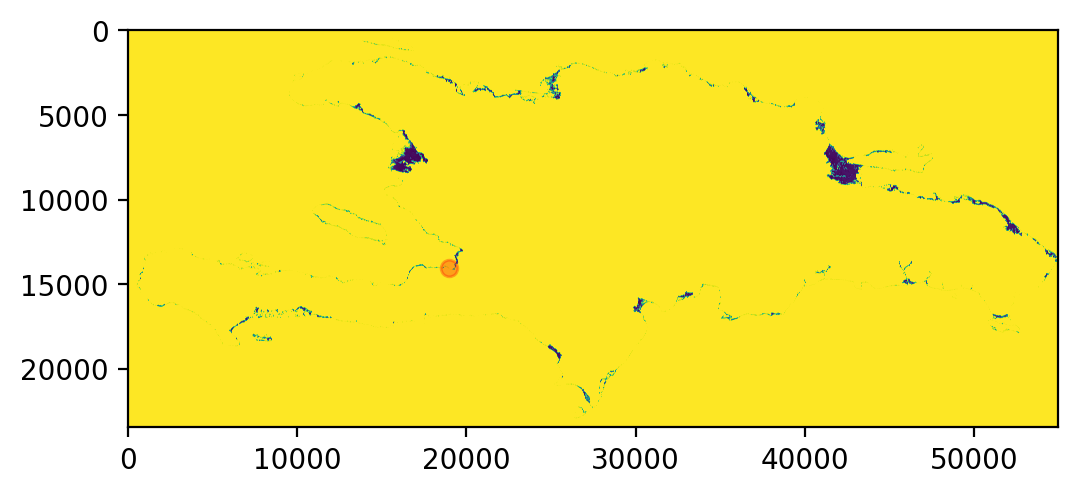

In [ ]:
plt.imshow(image.read(1)) # this eats up a lot of RAM
plt.scatter(cols, rows, c = "red", alpha = 0.3) # focus on this distinctive city area to ensure supplying latlon gets the correct pixel value
plt.show() 

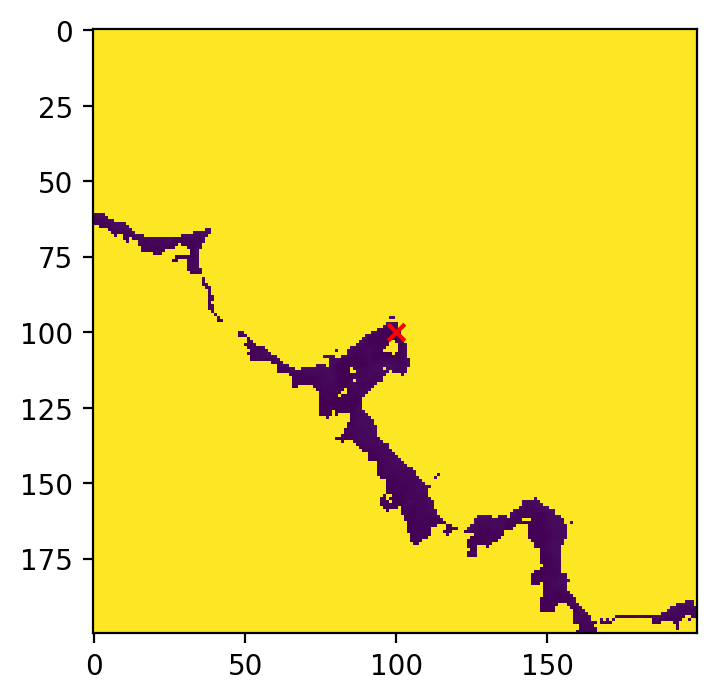

In [ ]:
plt.imshow(image.read(1, window = rasterio.windows.Window(cols-100, rows-100, 200, 200)))
plt.scatter(100, 100, marker = "x", c = "red") # this point was chosen as it is very recognisable
plt.show()

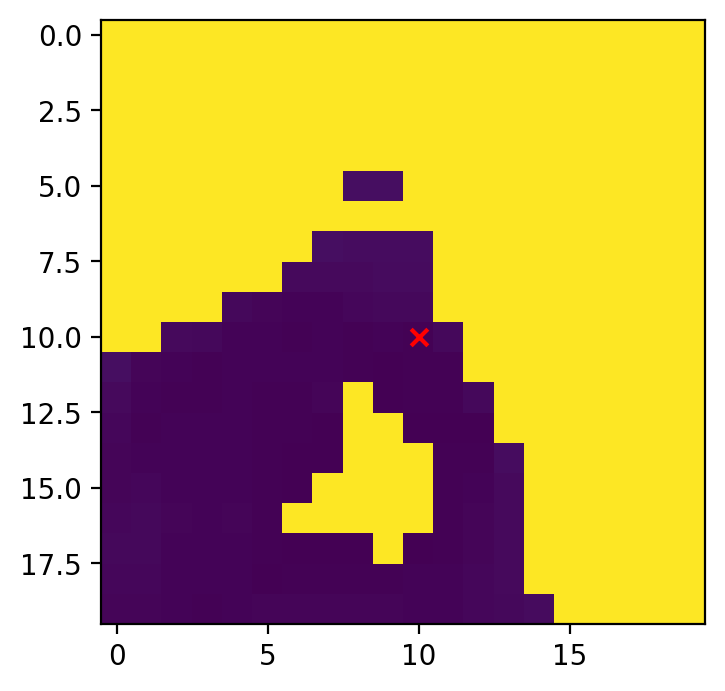

In [ ]:
plt.imshow(image.read(1, window = rasterio.windows.Window(cols-10, rows-10, 20, 20)))
plt.scatter(10, 10, marker = "x", c = "red") # this point was chosen as it is very recognisable
plt.show() 

In [ ]:
display(image.read(1, window = rasterio.windows.Window(cols-5, rows-5, 10, 10)))

array([[255, 255, 255,  10,  10, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255,  10,   9,   9,   9, 255, 255, 255, 255],
       [255,   7,   7,   7,   8,   8, 255, 255, 255, 255],
       [  4,   3,   3,   5,   6,   6, 255, 255, 255, 255],
       [  3,   2,   3,   2,   3,   2,   6, 255, 255, 255],
       [  3,   3,   3,   2,   1,   2,   2, 255, 255, 255],
       [  2,   2,   4, 255,   1,   2,   2,   6, 255, 255],
       [  2,   2,   1, 255, 255,   1,   1,   1, 255, 255],
       [  2,   1,   1, 255, 255, 255,   2,   2,   9, 255]], dtype=uint8)

In [ ]:
display(image.read(1, window = rasterio.windows.Window(cols, rows, 1, 1)))

array([[2]], dtype=uint8)

# Turn it into a useable function

In [ ]:
def download_storm_surge_data():
    """
    Downloads and unzips the storm surge data into the present working directory.
    """

    wget.download("https://www.nhc.noaa.gov/gis/hazardmaps/US_SLOSH_MOM_Inundation_v3.zip")
    wget.download("https://www.nhc.noaa.gov/gis/hazardmaps/Hispaniola_SLOSH_MOM_Inundation.zip")

    # the -o flag is for overwrite without asking permission

    with zipfile.ZipFile("US_SLOSH_MOM_Inundation_v3.zip", 'r') as zip_ref:
        zip_ref.extractall(".")

    with zipfile.ZipFile("Hispaniola_SLOSH_MOM_Inundation.zip", 'r') as zip_ref:
        zip_ref.extractall(".")


In [ ]:
def latlon_to_stormsurge(input_df: pd.core.frame.DataFrame, category: int) -> pd.core.frame.DataFrame:
    """
    Takes as input latlons in a pandas dataframe and returns the storm surge inundation at each latlon. Currently only functional for locations in Texas to Maine or in Hispaniola.

    Values of 1 corresponds to the 0-1 ft inundation bin, values of 2 corresponds to the 1-2 ft inundation bin, and so on up to 21 inclusive. 
    A value of 99 indicates a leveed area. A value of 255 indicates no data, either due to the location being underwater or too far inland.
    A value of 0 indicates the supplied latlons are not within the locations this function is valid for.

    Parameter
    ---------
    df : pd.core.frame.DataFrame
        An n x 2 sized dataframe containing with the first column contain lat and the second column containing lon.
    category: int
        An int between 1 and 5 inclusive giving the category of the hurricane to be used.

    Returns
    -------
    pd.core.frame.DataFrame
        A single pandas dataframe column giving the storm surge inundation.
    """

    def rows_cols_to_storm_surge(df):
        """
        A simple function that takes the rows and columns in the supplied dataframe and gets the storm surge value from the appropriate map
        """
        if df.location == "texas_to_maine":
            # a window size of 1 is used in the image read; this returns a numpy array with one element, which is extracted with .item() function
            return texas_to_maine_image.read(1, window = rasterio.windows.Window(df.cols, df.rows, 1, 1)).item()
        elif df.location == "haiti":
            return haiti_image.read(1, window = rasterio.windows.Window(df.cols, df.rows, 1, 1)).item()
        else:
            return 0

    # load images
    texas_to_maine_image = rasterio.open("." + str(category) + "_MOM_Inundation_HIGH.tif")
    haiti_image = rasterio.open("." + str(category) + "_MOM_Inundation_HighTide.tif")

    # some values to check, given a latlon coordinate, which tif file should be searched within
    # to distinguish between haiti and texas to maine, we use 2 points per location to create bounding boxes

    haiti_lon_min = -74.53520783870444
    haiti_lon_max = -68.31651208717756
    haiti_lat_min = 17.48216032912591
    haiti_lat_max = 20.130736297658242

    texas_to_maine_lon_min = -98.05986540280205
    texas_to_maine_lon_max = -75.39402341548211
    texas_to_maine_lat_min = 24.491674407495886
    texas_to_maine_lat_max = 36.75816955589585

    # create a copy of the input dataframe. This is needed as extra columns are added and should not be added to the original dataframe
    df = input_df.copy()

    # create some blank columns
    df["rows"] = 0
    df["cols"] = 0
    df["location"] = ""
    df["storm_surge"] = 0

    # this names the columns lat and lon for clarity
    df.rename(columns = {list(df)[0]: 'lat'}, inplace = True)
    df.rename(columns = {list(df)[1]: 'lon'}, inplace = True)

    # determine whether the latlon is in Haiti or the US
    df.loc[(df.lat <= haiti_lat_max) & (df.lat >= haiti_lat_min) & (df.lon <= haiti_lon_max) & (df.lon >= haiti_lon_min), "location"] = "haiti"
    df.loc[(df.lat <= texas_to_maine_lat_max) & (df.lat >= texas_to_maine_lat_min) & (df.lon <= texas_to_maine_lon_max) & (df.lon >= texas_to_maine_lon_min), "location"] = "texas_to_maine"

    # convert latlons into row/column format
    # this code looks insane, but it just converts the latlon to rows / columns using the appropriate transformation depending upon the location
    df.loc[df["location"] == "haiti", "rows"], df.loc[df["location"] == "haiti", "cols"] = rasterio.transform.rowcol(haiti_image.transform, df[df["location"] == "haiti"].lon, df[df["location"] == "haiti"].lat)
    df.loc[df["location"] == "texas_to_maine", "rows"], df.loc[df["location"] == "texas_to_maine", "cols"] = rasterio.transform.rowcol(texas_to_maine_image.transform, df[df["location"] == "texas_to_maine"].lon, df[df["location"] == "texas_to_maine"].lat)

    # loop through all row/columns and get the stormsurge value at that row/column
    df["storm_surge"] = df.apply(rows_cols_to_storm_surge, axis = 1)

    return(df["storm_surge"])

In [ ]:
download_storm_surge_data()

In [ ]:
# choose 3 haiti points and 3 US points for testing, and one bad location. the first two values are chosen on the coast, the third value is chosen slightly in the ocean
latlon_list = pd.DataFrame([[18.638641, -72.331067], [18.553196, -72.408681], [18.553752, -72.380271], [28.157927, -80.587846], [32.214255, -80.675551], [32.185472, -80.606953], [67.185472, -90.606953]]) 

In [ ]:
# these storm surge values make sense, as the 255 values come from locations that are in the ocean, whereas the first 2 are from locations just on the shore. the 0 is the flag for wrong location
latlon_list["storm_surge"] = latlon_to_stormsurge(latlon_list, category = 5)
latlon_list

,0,1,storm_surge
0,18.638641,-72.331067,7
1,18.553196,-72.408681,7
2,18.553752,-72.380271,255
3,28.157927,-80.587846,5
4,32.214255,-80.675551,18
5,32.185472,-80.606953,255
6,67.185472,-90.606953,0


In [ ]:
latlon_list["storm_surge"] = latlon_to_stormsurge(latlon_list, category = 4)
latlon_list

,0,1,storm_surge
0,18.638641,-72.331067,5
1,18.553196,-72.408681,5
2,18.553752,-72.380271,255
3,28.157927,-80.587846,1
4,32.214255,-80.675551,15
5,32.185472,-80.606953,255
6,67.185472,-90.606953,0


In [ ]:
latlon_list["storm_surge"] = latlon_to_stormsurge(latlon_list, category = 3)
latlon_list

,0,1,storm_surge
0,18.638641,-72.331067,2
1,18.553196,-72.408681,3
2,18.553752,-72.380271,255
3,28.157927,-80.587846,255
4,32.214255,-80.675551,10
5,32.185472,-80.606953,255
6,67.185472,-90.606953,0


In [ ]:
latlon_list["storm_surge"] = latlon_to_stormsurge(latlon_list, category = 2)
latlon_list

,0,1,storm_surge
0,18.638641,-72.331067,1
1,18.553196,-72.408681,2
2,18.553752,-72.380271,255
3,28.157927,-80.587846,255
4,32.214255,-80.675551,7
5,32.185472,-80.606953,255
6,67.185472,-90.606953,0


In [ ]:
latlon_list["storm_surge"] = latlon_to_stormsurge(latlon_list, category = 1)
latlon_list

,0,1,storm_surge
0,18.638641,-72.331067,255
1,18.553196,-72.408681,1
2,18.553752,-72.380271,255
3,28.157927,-80.587846,255
4,32.214255,-80.675551,3
5,32.185472,-80.606953,255
6,67.185472,-90.606953,0


# Getting Storm Surge for xBD latlons

In [ ]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
download_storm_surge_data()

In [ ]:
df = gpd.read_file("/content/drive/MyDrive/ai4er/python/hurricane/hurricane-harm-herald/data/df_points_posthurr.pkl")

DriverError: ignored

In [ ]:
df["geometry"].astype(shapely.geometry.point.Point)

NameError: ignored

In [ ]:
a = Point(-77.9244320492178, 34.78850199541164)
type(a)

shapely.geometry.point.Point

In [ ]:
df

,geometry,damage_class,disaster_name,capture_date
0,POINT (-77.9244320492178 34.78850199541164),2,hurricane-florence,2018-09-20T16:04:41.000Z
1,POINT (-77.92458589472702 34.78817409635829),1,hurricane-florence,2018-09-20T16:04:41.000Z
2,POINT (-85.61007417082075 30.200042174373575),0,hurricane-michael,2018-10-13T16:48:15.000Z
3,POINT (-85.61056875858309 30.20001239764311),0,hurricane-michael,2018-10-13T16:48:15.000Z
4,POINT (-85.6105468715275 30.20060087544323),1,hurricane-michael,2018-10-13T16:48:15.000Z
...,...,...,...,...
23049,POINT (-77.91796670865669 34.64623298093464),0,hurricane-florence,2018-09-20T16:04:41.000Z
23050,POINT (-77.91772594373008 34.64627829178596),0,hurricane-florence,2018-09-20T16:04:41.000Z
23051,POINT (-77.9176517767119 34.646497499155615),0,hurricane-florence,2018-09-20T16:04:41.000Z
23052,POINT (-77.91835147876859 34.64612284454794),0,hurricane-florence,2018-09-20T16:04:41.000Z


In [ ]:
type(df["capture_date"][0])

str

In [ ]:
df["geometry"][0]

'POINT (-77.9244320492178 34.78850199541164)'

In [ ]:
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [ ]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [ ]:
df = df.reindex("lat", "lon") # swap to get lat in 1st column and lon in 2nd column

In [ ]:
df["storm_surge"] = latlon_to_stormsurge(df[["lat", "lon"]], category = 5)
df